## Shortest path planning

example from motion planning course offered by Univ of Toronto

A map of Berkley, California is given
* Implement Dijkstra's search algorithm on a road network graph.
* Implement the A* search algorithm using a Euclidean heuristic on a road network graph. 

[OSMNX library](https://osmnx.readthedocs.io/en/stable/) is used to generate Python graphs from Open Street Map (OSM) data.  

In [2]:
!pip install osmnx

     |████████████████████████████████| 102kB 5.0MB/s 
     |████████████████████████████████| 6.6MB 25.9MB/s 
     |████████████████████████████████| 10.3MB 34.7MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 1.0MB 37.3MB/s 
     |████████████████████████████████| 1.0MB 32.7MB/s 
     |████████████████████████████████| 15.4MB 196kB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import KDTree 

We are going to local path planning in Berkeley, California, between the two nodes given below. After running the code up to and including the box below, you should see the output of the shortest path between the two points. 

In [2]:
#from https://github.com/sidmitra/osmnx_playground

dist = 4*805 # radius in meters(approx 2 miles)
places = [
    ['delhi', (28.632821, 77.219459)], 
    ['mumbai', (18.932018, 72.834971)], 
    ['kolkatta', (22.566929, 88.347260)], 
    ['chennai', (13.080271, 80.284657)], 
    ['bengaluru', (12.977830, 77.593817)], 
    ['hyderabad', (17.366103, 78.469492)], 
    ['ahmedabad', (23.026948, 72.574903)], 
    ['jaipur', (26.907290, 75.805467)], 
    ['chandigarh', (30.732453, 76.772294)],
    ['pune', (18.519708, 73.856646)],
    ['lucknow', (26.845984, 80.946011)],
    ['gandhinagar', (23.224847, 72.646416)],   
]

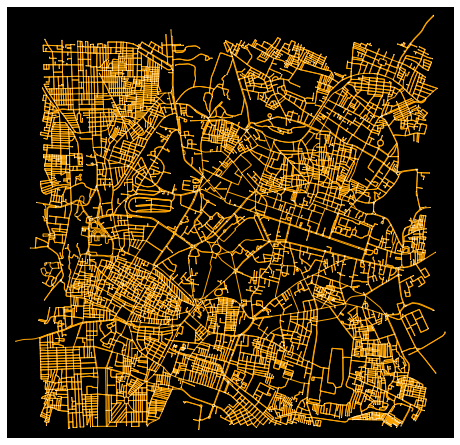

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
name, point = places[4]
nt = 'drive_service'
G = ox.graph_from_point(point, dist=dist,dist_type="bbox", network_type=nt, truncate_by_edge=True)
ox.plot_graph(G, node_size=1, edge_color='orange', bgcolor='#000000', show=True)

Print the edges and nodes of this graph

In [4]:
G.number_of_edges() 


20278

In [5]:
print(G.nodes())
G.number_of_nodes()

[17327429, 17327433, 26529522, 26529524, 26529532, 26529553, 26529574, 26529589, 26529654, 26529655, 60952254, 60952260, 60952268, 60952288, 60952290, 60952294, 60952298, 60952302, 61748543, 61748553, 61748555, 61748559, 62011472, 62011481, 62013232, 62067292, 62067302, 158687972, 245614692, 245615180, 246167200, 246171012, 246171013, 246171015, 246171016, 246397920, 246397923, 247958462, 247958463, 247958465, 247966134, 247966138, 247991563, 248003858, 248003859, 248003860, 248003861, 248003862, 248003863, 248455233, 248455237, 248455238, 248455241, 248455257, 248455429, 248455430, 248455431, 248455433, 248455434, 248455435, 248455438, 248455441, 248455447, 248455450, 248455451, 248455457, 248455459, 248455465, 248455468, 248455472, 248455473, 248455474, 248455475, 248455478, 248455479, 248455480, 248455481, 248455482, 248455483, 248455485, 248455487, 248459794, 248459796, 248459797, 248459808, 248459809, 248459811, 248459812, 248459820, 248459821, 248459827, 248459829, 248459833, 248

7760

Arbitrarily select the first node and last node in the Graph and find the shortest path

In [6]:
origin = 17327433
destination = 459793726
shortest_path = nx.shortest_path(G, origin, destination)


Now visualize using plot_graph_route

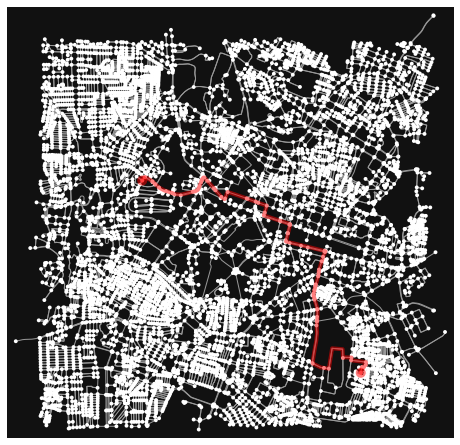

In [7]:
fig, ax = ox.plot_graph_route(G,shortest_path,route_color='r')

In [8]:
# Problem adapted from Introduction to AI, U of Toronto
# https://github.com/booklover98/A-star-Pathfinding

oshawa = (43.945403, -78.892466)
G = ox.graph_from_point(oshawa, dist=2000)
start = ox.geocode('2000 Simcoe St N, Oshawa, Ontario')
end = ox.geocode('18 Niagara Dr, Oshawa, Ontario')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
278589216,43.928847,-78.874744,3,NaN,POINT (-78.87474 43.92885)
278589217,43.928758,-78.874863,3,NaN,POINT (-78.87486 43.92876)
278589220,43.928360,-78.877049,3,NaN,POINT (-78.87705 43.92836)
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017)
278589617,43.949039,-78.885790,3,NaN,POINT (-78.88579 43.94904)


In [9]:
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
print(nodes)
start_idx = tree.query([start], k=1, return_distance=False)[0]
end_idx = tree.query([end], k=1, return_distance=False)[-1]

closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]
print(closest_start_node)
print(closest_end_node)

#retrieve origin and destination node id
origin = closest_start_node.index.values[0]
destination = closest_end_node.index.values[0]

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)


                    y          x  ...  highway                    geometry
osmid                             ...                                     
278589216   43.928847 -78.874744  ...      NaN  POINT (-78.87474 43.92885)
278589217   43.928758 -78.874863  ...      NaN  POINT (-78.87486 43.92876)
278589220   43.928360 -78.877049  ...      NaN  POINT (-78.87705 43.92836)
278589616   43.950166 -78.885872  ...      NaN  POINT (-78.88587 43.95017)
278589617   43.949039 -78.885790  ...      NaN  POINT (-78.88579 43.94904)
...               ...        ...  ...      ...                         ...
8676806160  43.946264 -78.898065  ...      NaN  POINT (-78.89807 43.94626)
8676806165  43.947120 -78.899484  ...      NaN  POINT (-78.89948 43.94712)
8711234634  43.941546 -78.868802  ...      NaN  POINT (-78.86880 43.94155)
8756731609  43.954277 -78.908807  ...      NaN  POINT (-78.90881 43.95428)
8756731610  43.954173 -78.908766  ...      NaN  POINT (-78.90877 43.95417)

[1913 rows x 5 columns]


Visualize the shortest path and graph

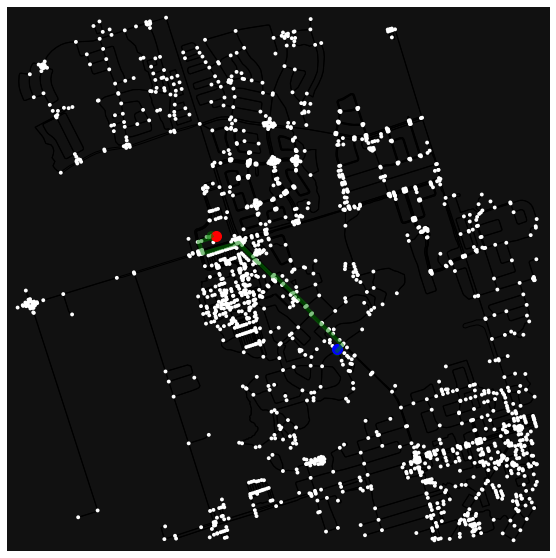

In [10]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(closest_start_node['y'], closest_start_node['x'], c='green', s=100)
ax.scatter(closest_end_node['y'], closest_end_node['x'], c='green', s=100)

Use these ideas to find shortest path between 2 addresses/ geocodes in an Indian city of your choice 

In [25]:
bangalore = (12.977830, 77.593817)
G = ox.graph_from_point(bangalore, dist=4*805)
start = ox.geocode('Halasuru, Bangalore, Karnataka')
end = ox.geocode('PES University, Bangalore, Karnataka')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
17327429,12.993304,77.583961,3,NaN,POINT (77.58396 12.99330)
17327433,12.985979,77.579294,3,NaN,POINT (77.57929 12.98598)
26529522,12.974710,77.620006,4,traffic_signals,POINT (77.62001 12.97471)
26529524,12.975682,77.620233,3,NaN,POINT (77.62023 12.97568)
26529532,12.978554,77.620559,3,NaN,POINT (77.62056 12.97855)


In [27]:
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
print(nodes)
start_idx = tree.query([start], k=1, return_distance=False)[0]
end_idx = tree.query([end], k=1, return_distance=False)[-1]

closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]
print(closest_start_node)
print(closest_end_node)

#retrieve origin and destination node id
origin = closest_start_node.index.values[0]
destination = closest_end_node.index.values[0]

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)

                    y          x  ...          highway                   geometry
osmid                             ...                                            
17327429    12.993304  77.583961  ...              NaN  POINT (77.58396 12.99330)
17327433    12.985979  77.579294  ...              NaN  POINT (77.57929 12.98598)
26529522    12.974710  77.620006  ...  traffic_signals  POINT (77.62001 12.97471)
26529524    12.975682  77.620233  ...              NaN  POINT (77.62023 12.97568)
26529532    12.978554  77.620559  ...              NaN  POINT (77.62056 12.97855)
...               ...        ...  ...              ...                        ...
8504197414  12.984612  77.588628  ...              NaN  POINT (77.58863 12.98461)
8590029555  12.997888  77.623249  ...              NaN  POINT (77.62325 12.99789)
8594821811  13.000552  77.621158  ...              NaN  POINT (77.62116 13.00055)
8594821812  13.000682  77.620825  ...              NaN  POINT (77.62082 13.00068)
8785025867  12.9

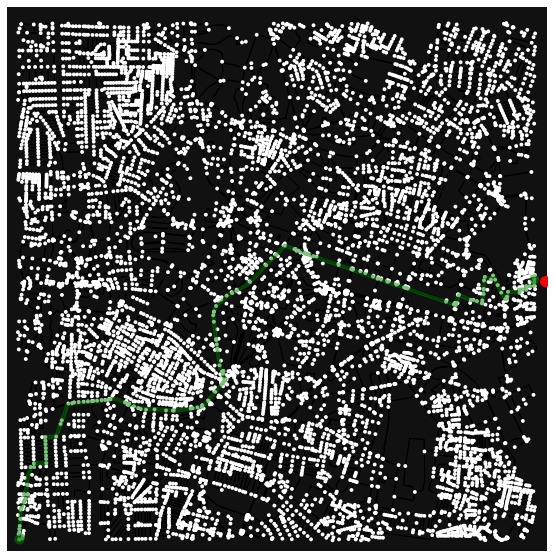

In [28]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(closest_start_node['y'], closest_start_node['x'], c='green', s=100)
ax.scatter(closest_end_node['y'], closest_end_node['x'], c='green', s=100)